## Keyphrase extraction from sociology papers
This notebook contains the efforts to extract crucial n-grams identifying the concept of Nation from some sociology papers published between the end of the 20th century and the beginning of the 21st century. The papers are in French (11 papers) and in German (4 papers)

In [1]:
# imports
import pandas as pd
import glob
from nltk.corpus import stopwords
import nltk 
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import gensim
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import spacy
import json

In [4]:
#loading the data
french_txt = []

for file in glob.glob("data_sociology/french*.txt"):
    print(file)
    french_txt.append(open(file, "r", encoding='utf8').read())
    
german_txt = []

for file in glob.glob("data_sociology/german*.txt"):
    german_txt.append(open(file, "r", encoding='utf8').read())
    
print(len(french_txt), len(german_txt))

data_sociology\french-Babadzan.txt
data_sociology\french-DIECKHOFF.txt
data_sociology\french-gellner.txt
data_sociology\french-GODECHOT.txt
data_sociology\french-Hermet.txt
data_sociology\french-Ipperciel-2.txt
data_sociology\french-Ipperciel.txt
data_sociology\french-Ledermann.txt
data_sociology\french-racisme.txt
data_sociology\french-renans-rev.txt
data_sociology\french-swiss-nationality.txt
11 4


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#loading the data
french_baseline = []
for file in glob.glob("baseline_sociology/french*.txt"):
    french_baseline.append(open(file, "r", encoding='utf8').read())
    
german_baseline = []

for file in glob.glob("baseline_sociology/german*.txt"):
    german_baseline.append(open(file, "r", encoding='utf8').read())
    
print(len(french_baseline), len(german_baseline))

11 4


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Preprocessing
- punctuation removal
- stopword removal
- (OPTIONAL) language filtering
- lemmatization
- part-of-speech tagging filtering

In [6]:
#english_vocab = set(w.lower() for w in nltk.corpus.words.words())
#text_vocab = set(w.lower() for w in ' '.join(french_txt+german_txt).split() if w.lower().isalpha())
#unusual = text_vocab.intersection(english_vocab)
#unusual.add('cookies')
#len(unusual)

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
#! python -m spacy download de_core_news_sm
#! python -m spacy download fr_core_news_sm

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
pos_to_keep = ['ADJ', 'ADV', 'NOUN', 'PROPN', 'VERB']

french_txt_sw = []
french_baseline_sw = []

tokenizer = nltk.RegexpTokenizer(r"\w+")

#load spacy corpuses
nlp_de = spacy.load('de_core_news_sm')
nlp_fr = spacy.load('fr_core_news_sm')

def lematization_pos_tagging(tagging_language_funtion, text):
    doc = tagging_language_funtion(text)
    lemmatized = [x.lemma_ for x in doc if x.pos_ in pos_to_keep and x.is_stop != True]
    return lemmatized

for i in range(len(french_txt)):
    print(i)
    if len(french_txt[i])< 100000:
        text_tokens = lematization_pos_tagging(nlp_fr, french_txt[i])
    else:
        text_tokens = lematization_pos_tagging(nlp_fr, french_txt[i][:99999])
    french_txt_sw.append(' '.join(text_tokens))
    text_tokens = lematization_pos_tagging(nlp_fr, french_baseline[i])
    french_baseline_sw.append(' '.join(text_tokens))
    
        
    
german_txt_sw = []
german_baseline_sw = []

for i in range(len(german_txt)):
    print(i)
    text_tokens = lematization_pos_tagging(nlp_de, german_txt[i])
    german_txt_sw.append(' '.join(text_tokens))
    text_tokens = lematization_pos_tagging(nlp_de, german_baseline[i])
    german_baseline_sw.append(' '.join(text_tokens))
    
print(french_txt_sw[0][:20], '\n', german_txt_sw[0][:20])

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
invention tradition  
 Nationalismus Nation


In [9]:
str_french = ' '.join(french_txt_sw)
french = french_baseline_sw + [str_french]
len(french)
str_german = ' '.join(german_txt_sw)
german = german_baseline_sw + [str_german]
len(german)

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5

In [10]:
len(french[11])

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


378490

for the future: stemming part of speech tagging and do with adjectives more texts more preprocessing in general LDA

### Frequent n-gram extraction

In [11]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(french[:12])
df_tfidf = pd.DataFrame(X.toarray())
swiss_tfidf = df_tfidf[df_tfidf.index==11]
swiss_tfidf= swiss_tfidf.T.sort_values(by=11, ascending=False)


swiss_indexes = swiss_tfidf.index
feature_names = vectorizer.get_feature_names()
term_list = [feature_names[i] for i in swiss_indexes]
print(term_list[:100])

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['nationalisme', 'nationalité', 'nation', 'racisme', 'suisse', 'convention', 'droit', 'etat', 'national', 'politique', 'patrie', 'anderson', 'smith', 'culture', 'tradition', 'culturel', 'peuple', 'nationaliste', 'hobsbawm', 'voir', 'naturalisation', 'nairn', 'habermas', 'nationaliter', 'social', 'nationalism', 'langue', 'moderne', 'europe', 'renan', 'gellner', 'patriote', 'homme', 'mot', 'principe', 'phénomène', 'linguistique', 'art', 'question', 'citoyen', 'pouvoir', 'rapport', 'patriotisme', 'naim', 'public', 'sens', 'théoricien', 'inventer', 'sentiment', 'cas', 'théorie', 'grand', 'raison', 'populaire', 'également', 'état', 'société', 'communauté', 'lien', 'pays', 'général', 'européen', 'fédéral', 'individu', 'ethnique', 'étude', 'unité', 'chapitre', 'forme', 'alémanique', 'romand', 'faire', 'nouveau', 'auteur', 'idée', 'siècle', 'mettre', 'canton', 'empire', 'identité', 'définition', 'ensemble', 'origine', 'international', 'débat', 'travail', 'français', 'souveraineté', 'populisme'

In [34]:
# Selected words:
for word in term_list[:50]:
    print(word)

nationalité
convention
droit
etat
art
naturalisation
suisse
nationaliter
numéro
international
voir
infra
fédéral
matière
paul
françois
cour
également
chapitre
européen
procédure
acquisition
général
apatridie
henri
ordinaire
domaine
recueil
traité
prévoir
juridique
rs
explicatif
let
batiffol
compétence
monsieur
relatif
homme
étranger
avril
règle
borella
citoyenneté
entrer
cas
lagarde
perte
obligation
rapport


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
# impresso results

# Reading the json as a dict
with open('unigrams_french.json') as json_data:
    trends_french = json.load(json_data)

trends_french

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'url': 'https://impresso-project.ch/app/search/ngrams?sq=CgcYCSoDR0RMCgIYAgoOEAIYByABKgZuYXRpb24%3D&unigrams=nationalit%C3%A9,convention,droit,etat,art,naturalisation,suisse,nationaliter,num%C3%A9ro,international,voir,infra,f%C3%A9d%C3%A9ral,mati%C3%A8re,paul,fran%C3%A7ois,cour,%C3%A9galement,chapitre,europ%C3%A9en,proc%C3%A9dure,acquisition,g%C3%A9n%C3%A9ral,apatridie,henri,ordinaire,domaine,recueil,trait%C3%A9,pr%C3%A9voir,juridique,rs,explicatif,let,batiffol,comp%C3%A9tence,monsieur,relatif,homme,%C3%A9tranger,avril,r%C3%A8gle,borella,citoyennet%C3%A9,entrer,cas,lagarde,perte,obligation,rapport',
 'filters': [{'type': 'newspaper', 'q': 'GDL'}, {'type': 'hasTextContents'}],
 'exportDate': '2021-05-10T14:11:40.007Z',
 'data': [{'label': 'nationalitÃ©',
   'items': [{'value': 0, 'total': 214236, 'ppm': 0, 'date': '1798'},
    {'value': 0, 'total': 286891, 'ppm': 0, 'date': '1799'},
    {'value': 0, 'total': 338670, 'ppm': 0, 'date': '1804'},
    {'value': 0, 'total': 278960, 'ppm': 0,

In [35]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(german)
df_tfidf = pd.DataFrame(X.toarray())
swiss_tfidf = df_tfidf[df_tfidf.index==4]
swiss_tfidf=swiss_tfidf.T.sort_values(by=4, ascending=False)


swiss_indexes = swiss_tfidf.index
feature_names = vectorizer.get_feature_names()
term_list = [feature_names[i] for i in swiss_indexes]
print(term_list[:100])

['nation', 'nationalstaat', 'deutsch', 'nationalismus', 'national', 'europa', 'politisch', 'schweiz', 'staat', 'österreich', 'revolution', 'deutschland', 'jahrhundert', 'volk', 'nationsbildung', '19', 'geschichte', 'politische', 'reich', 'jahn', 'einheit', 'sängerbewegung', 'entstehen', 'krieg', 'schwäbisch', 'fremde', 'frankreich', 'europäisch', 'kulturell', 'gesellschaft', 'preuße', 'idee', 'deutsche', 'leben', 'bund', 'turnbewegung', 'lassen', 'modern', 'schweizer', 'alt', 'verein', 'turner', 'grenze', 'land', 'bewegung', 'müssen', 'gemeinsam', 'bilden', 'bleiben', 'ziel', 'nationalbewegung', 'stadt', 'gelten', 'zeigen', 'gehören', 'fest', 'schaffen', 'historisch', 'entwicklung', 'staatlich', 'preußisch', 'sprechen', 'sozial', 'mitglied', 'kraft', 'mensch', 'zuvor', 'gott', 'prozeß', 'territorium', 'militärisch', 'sänger', 'stark', 'stellen', 'tragen', 'kampf', 'weltkrieg', 'gegenwart', 'neu', 'nennen', 'bestimmen', 'religiös', 'vergangenheit', 'vorstellung', 'stehen', 'europäische'

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
# Selected words:

for word in term_list[:50]:
    print(word)

nation
nationalstaat
deutsch
nationalismus
national
europa
politisch
schweiz
staat
österreich
revolution
deutschland
jahrhundert
volk
nationsbildung
19
geschichte
politische
reich
jahn
einheit
sängerbewegung
entstehen
krieg
schwäbisch
fremde
frankreich
europäisch
kulturell
gesellschaft
preuße
idee
deutsche
leben
bund
turnbewegung
lassen
modern
schweizer
alt
verein
turner
grenze
land
bewegung
müssen
gemeinsam
bilden
bleiben
ziel


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# impresso results

# Reading the json as a dict
with open('unigrams_german.json') as json_data:
    trends_german = json.load(json_data)

trends_german

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'url': 'https://impresso-project.ch/app/search/ngrams?sq=CgcYCSoDTlpaCgIYAgoOEAIYByABKgZuYXRpb24%3D&unigrams=nation,nationalstaat,deutsch,nationalismus,national,europa,politisch,schweiz,staat,%C3%B6sterreich,revolution,deutschland,jahrhundert,volk,nationsbildung,19,geschichte,politische,reich,jahn,einheit,s%C3%A4ngerbewegung,entstehen,krieg,schw%C3%A4bisch,fremde,frankreich,europ%C3%A4isch,kulturell,gesellschaft,preu%C3%9Fe,idee,deutsche,leben,bund,turnbewegung,lassen,modern,schweizer,alt,verein,turner,grenze,land,bewegung,m%C3%BCssen,gemeinsam,bilden,bleiben,ziel',
 'filters': [{'type': 'newspaper', 'q': 'NZZ'}, {'type': 'hasTextContents'}],
 'exportDate': '2021-05-10T14:13:28.907Z',
 'data': [{'label': 'nation',
   'items': [{'value': 86,
     'total': 351592,
     'ppm': 244.6016974220119,
     'date': '1780'},
    {'value': 67, 'total': 368522, 'ppm': 181.80732764936693, 'date': '1781'},
    {'value': 89, 'total': 372075, 'ppm': 239.1990862057381, 'date': '1782'},
    {'value': 85

In [15]:
vectorizer = TfidfVectorizer(ngram_range=(2,4))
X = vectorizer.fit_transform(french[:12])
df_tfidf = pd.DataFrame(X.toarray())
swiss_tfidf = df_tfidf[df_tfidf.index==11]
swiss_tfidf= swiss_tfidf.T.sort_values(by=11, ascending=False)


swiss_indexes = swiss_tfidf.index
feature_names = vectorizer.get_feature_names()
term_list = [feature_names[i] for i in swiss_indexes]
print(term_list[:200])

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['racisme nationalisme', 'droit nationalité', 'théorie nationalisme', 'convention nationalité', 'théoricien nationalisme', 'tradition inventer', 'convention européen', 'droit homme', 'art convention', 'nationalisme racisme', 'mot patrie', 'articulation racisme', 'articulation racisme nationalisme', 'lien racisme', 'lien racisme nationalisme', 'européen nationalité', 'invention tradition', 'convention européen nationalité', 'rapport explicatif convention', 'explicatif convention', 'art let', 'naturalisation ordinaire', 'explicatif convention européen', 'rapport explicatif', 'nationalité droit', 'rapport explicatif convention européen', 'nation moderne', 'nationalité numéro', 'mot nation', 'droit international', 'convention européen nationalité numéro', 'anthony smith', 'relation racisme', 'droit fondamental', 'européen nationalité numéro', 'explicatif convention européen nationalité', 'espace public', 'let convention', 'art convention nationalité', 'procédure naturalisation', 'batiffol 

In [16]:
vectorizer = TfidfVectorizer(ngram_range=(2,4))
X = vectorizer.fit_transform(german)
df_tfidf = pd.DataFrame(X.toarray())
swiss_tfidf = df_tfidf[df_tfidf.index==4]
swiss_tfidf=swiss_tfidf.T.sort_values(by=4, ascending=False)


swiss_indexes = swiss_tfidf.index
feature_names = vectorizer.get_feature_names()
term_list = [feature_names[i] for i in swiss_indexes]
print(term_list[:200])

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['deutsch nation', '19 jahrhundert', 'deutsch nationalstaat', 'deutsche bund', 'deutsch staat', 'nation nationalstaat', 'deutsch geschichte', 'hälfte 19 jahrhundert', 'modern nationalismus', 'hälfte 19', 'schwäbisch sängerbewegung', 'deutsch nationalbewegung', '18 jahrhundert', 'prozeß nationsbildung', 'idee nation', 'schwäbische sängerbewegung', 'national bewegung', 'modern nation', '20 jahrhundert', 'französische revolution', 'alte reich', 'deutsch sängerbewegung', 'schwäbisch sängerbund', 'schwäbische sängerbundes', 'deutsch volk', 'spät 18', 'idee deutsch', 'partizipation aggression', 'kleindeutschen nationalstaat', 'staat gesellschaft', 'otto elben', '19 20', 'sozial bewegung', 'karl pfaff', 'frage stellen', 'mehrheits minderheitenspannungen', 'deutsch kulturnation', 'einzeln staat', 'deutsch nationalismus', 'gründung nationalstaat', 'nation nationalismus', '19 20 jahrhundert', 'innen außen', 'staat deutsche', 'spät 18 jahrhundert', 'weimarer republik', 'europäisch staat', 'deutsc

In [17]:
# only swiss vs general nationality          
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(french_txt_sw[:11])
df_tfidf = pd.DataFrame(X.toarray())
swiss_tfidf = df_tfidf[df_tfidf.index==10]
swiss_tfidf= swiss_tfidf.T.sort_values(by=10, ascending=False)


swiss_indexes = swiss_tfidf.index
feature_names = vectorizer.get_feature_names()
term_list = [feature_names[i] for i in swiss_indexes]
print(term_list[:100])

['nationalité', 'convention', 'droit', 'etat', 'art', 'naturalisation', 'suisse', 'nationaliter', 'numéro', 'international', 'voir', 'infra', 'fédéral', 'matière', 'paul', 'françois', 'cour', 'également', 'chapitre', 'européen', 'procédure', 'acquisition', 'général', 'apatridie', 'henri', 'ordinaire', 'domaine', 'recueil', 'traité', 'prévoir', 'juridique', 'rs', 'explicatif', 'let', 'batiffol', 'compétence', 'monsieur', 'relatif', 'homme', 'étranger', 'avril', 'règle', 'borella', 'citoyenneté', 'entrer', 'cas', 'lagarde', 'perte', 'obligation', 'rapport', 'théorie', 'titre', 'militaire', 'ratifier', 'conseil', 'immer', 'haye', 'francisco', 'décembre', 'rezek', 'décision', 'vigueur', 'protocole', 'apatride', 'tribunal', 'chan', 'johannes', 'ressortissant', 'réglementation', 'disposition', 'loi', 'coutumier', 'principe', 'terme', 'pierre', 'vol', 'femme', 'roland', 'alexander', 'weis', 'jacques', 'kotalakidi', 'hélène', 'enfant', 'justice', 'condition', 'national', 'manière', 'josé', 'lé

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
french_bigrams = (pd.Series(nltk.ngrams(' '.join(french_txt_sw).split(), 2)).value_counts())[:30]
french_trigrams = (pd.Series(nltk.ngrams(' '.join(french_txt_sw).split(), 3)).value_counts())[:30]

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, '# of Occurances')

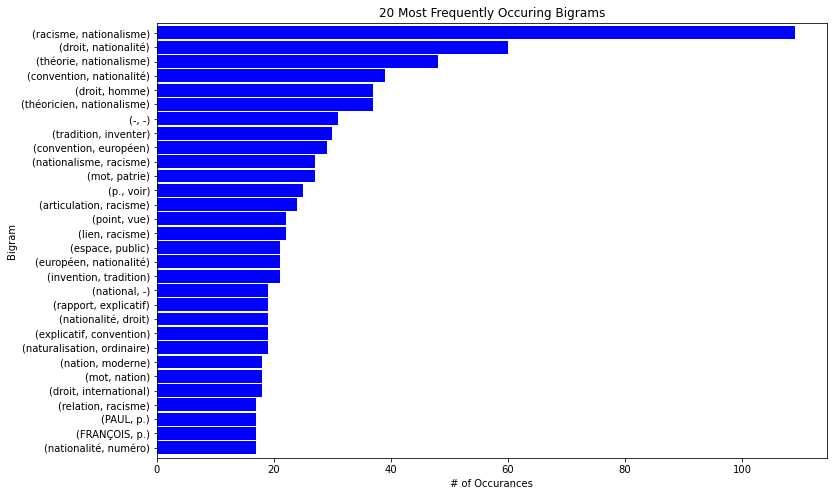

In [19]:
french_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, '# of Occurances')

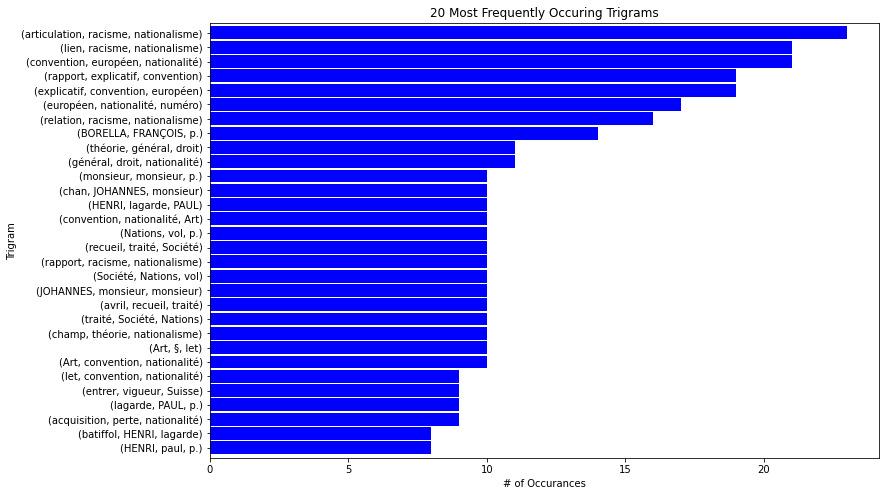

In [20]:
french_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [21]:
german_bigrams = (pd.Series(nltk.ngrams(' '.join(german_txt_sw).split(), 2)).value_counts())[:40]
german_trigrams = (pd.Series(nltk.ngrams(' '.join(german_txt_sw).split(), 3)).value_counts())[:35]

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, '# of Occurances')

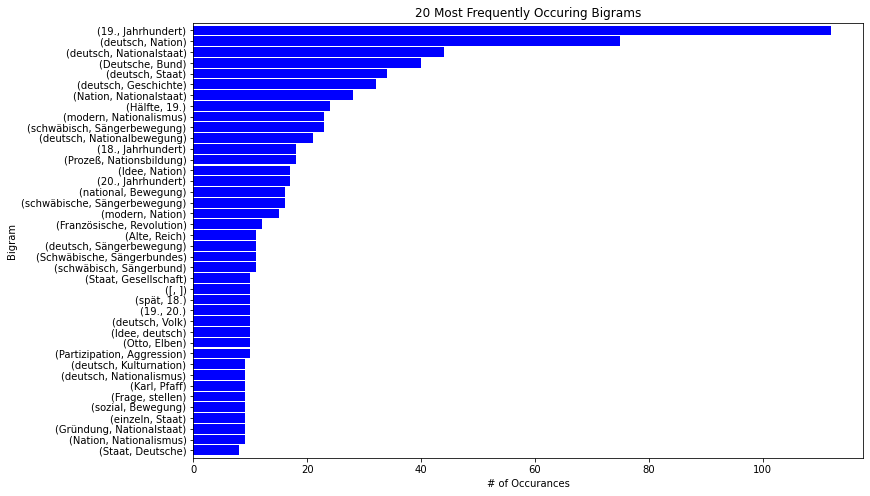

In [22]:
german_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, '# of Occurances')

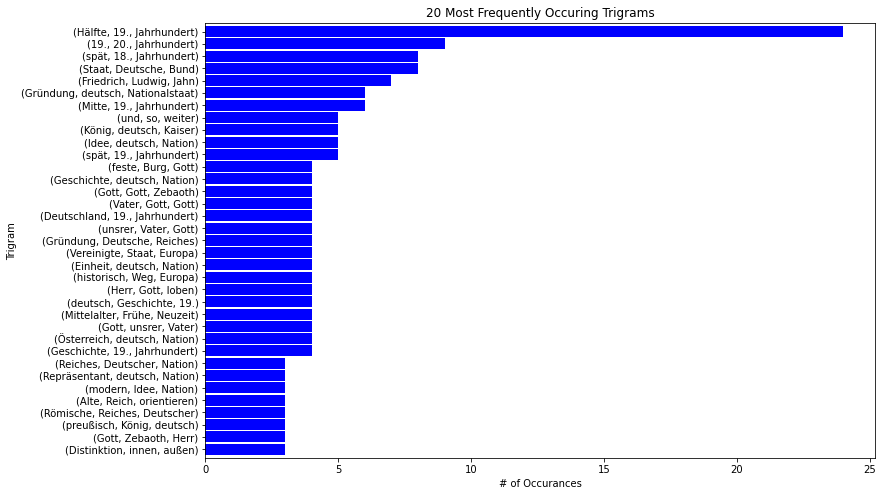

In [23]:
german_trigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

### Trying out some LDA to get only words related to topic nationality

In [24]:
french_tokens = [tokenizer.tokenize(french) for french in french_txt_sw]
# Create Dictionary
id2word = corpora.Dictionary(french_tokens)
# Create Corpus
texts = french_tokens
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 3), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 2), (15, 3), (16, 1), (17, 1), (18, 1), (19, 13), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)]


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.012647  0.001165       1        1  34.744100
9      0.003382 -0.002133       2        1  23.240440
4      0.037255 -0.001469       3        1  16.530206
3     -0.001539  0.012040       4        1  16.086270
8      0.007296 -0.001536       5        1   7.864373
0     -0.015514 -0.000523       6        1   1.502887
6     -0.007399 -0.006580       7        1   0.021887
5     -0.006362 -0.003795       8        1   0.004915
1     -0.009120 -0.000895       9        1   0.002461
7      0.004647  0.003724      10        1   0.002461, topic_info=              Term        Freq       Total Category  logprob  loglift
1409  nationalisme  581.000000  581.000000  Default  30.0000  30.0000
1407        nation  394.000000  394.000000  Default  29.0000  29.0000
1590     politique  251.000000  251.000000  Default  28.0000  28.0000
1412   nationalité  329.000000  329.000000  Default  27.0000  27.0000
1408      national  262.000000  262.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
1564        peuple    0.002234   97.796718  Topic10  -6.2055  -0.0742
1245        langue    0.002209   98.132803  Topic10  -6.2170  -0.0891
169         Suisse    0.002295  122.233011  Topic10  -6.1785  -0.2703
1970        social    0.002281  120.406495  Topic10  -6.1850  -0.2616
1734      question    0.002077   98.913035  Topic10  -6.2787  -0.1588

[846 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2302      1  0.369264  Anderson
2302      2  0.213037  Anderson
2302      3  0.028405  Anderson
2302      4  0.312454  Anderson
2302      5  0.056810  Anderson
...     ...       ...       ...
2289      3  0.182775      être
2289      4  0.121850      être
2289      5  0.121850      être
2290      1  0.348849       île
2290      2  0.348849       île

[1908 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 5, 4, 9, 1, 7, 6, 2, 8])

In [27]:
for index, topic in lda_model.show_topics(formatted=False, num_words=40):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

Topic: 0 
Words: ['nationalisme', 'politique', 'nation', 'national', 'racisme', 'droit', 'tradition', 'etat', 'culture', 'moderne', 'd', 'peuple', 'langue', 'social', 'voir', 'sens', 'mot', 'pouvoir', 'p', 'l', 'Suisse', 'nationalité', 'Smith', 'culturel', 'grand', 'nouveau', 'question', 'faire', 'principe', 'état', 'raison', 'étude', 'cas', 'public', 'agir', 'auteur', 'patrie', 'mettre', 'phénomène', 'société']
Topic: 1 
Words: ['nationalisme', 'nation', 'politique', 'national', 'droit', 'tradition', 'culture', 'racisme', 'p', 'nationalité', 'social', 'l', 'langue', 'd', 'etat', 'moderne', 'question', 'culturel', 'pouvoir', 'rapport', 'sens', 'Suisse', 'sentiment', 'également', 'voir', 'cas', 'mot', 'raison', 'Europe', 'société', 'homme', 'convention', 'peuple', 'Habermas', 'exemple', 'travail', 'grand', 'pays', 'Smith', 'public']
Topic: 2 
Words: ['nationalisme', 'nation', 'politique', 'national', 'culture', 'droit', 'd', 'tradition', 'p', 'racisme', 'l', 'nationalité', 'voir', 'cult

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
german_tokens = [tokenizer.tokenize(german) for german in german_txt_sw]
# Create Dictionary
id2word = corpora.Dictionary(german_tokens)
# Create Corpus
texts = german_tokens
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 5), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 5), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


In [29]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.012013  0.000009       1        1  60.851129
5      0.004688 -0.000747       2        1  16.723229
1     -0.008544  0.001746       3        1  12.385228
9      0.002658  0.002521       4        1   9.988038
2     -0.003505 -0.002934       5        1   0.047605
4     -0.003077 -0.001715       6        1   0.000954
3      0.003849  0.000191       7        1   0.000954
7      0.004182  0.001295       8        1   0.000954
8      0.003147  0.001230       9        1   0.000954
0      0.008614 -0.001597      10        1   0.000954, topic_info=               Term        Freq       Total Category  logprob  loglift
1439        deutsch  422.000000  422.000000  Default  30.0000  30.0000
798          Nation  432.000000  432.000000  Default  29.0000  29.0000
811   Nationalstaat  288.000000  288.000000  Default  28.0000  28.0000
806   Nationalismus  224.000000  224.000000  Default  27.0000  27.0000
1016          Staat  215.000000  215.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
7                19    0.000600  128.136222  Topic10  -6.5152  -0.7111
1253            alt    0.000507   67.422202  Topic10  -6.6845  -0.2383
1148           Volk    0.000523   93.525901  Topic10  -6.6533  -0.5343
919      Revolution    0.000502  107.379404  Topic10  -6.6936  -0.7128
672           Krieg    0.000498   79.878214  Topic10  -6.7027  -0.4260

[879 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
7          1  0.671161          19
7          2  0.124867          19
7          3  0.124867          19
7          4  0.078042          19
10607      1  0.589885      Alfred
...      ...       ...         ...
2501       1  0.665254  Österreich
2501       2  0.123547  Österreich
2501       3  0.123547  Österreich
2501       4  0.076029  Österreich
2526       1  0.787433        ölen

[1192 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 2, 10, 3, 5, 4, 8, 9, 1])

In [30]:
for index, topic in lda_model.show_topics(formatted=False, num_words=40):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

Topic: 0 
Words: ['deutsch', 'Nationalstaat', 'national', 'Nation', 'Schweiz', 'Nationalismus', 'Staat', 'politisch', 'Europa', 'Geschichte', 'Deutschland', 'Gesellschaft', 'Deutsche', 'lassen', 'Jahrhundert', 'zeigen', 'politische', 'bleiben', '19', 'gemeinsam', 'Österreich', 'entstehen', 'stehen', 'modern', 'Mensch', 'Volk', 'Jahn', 'alt', 'Revolution', 'Krieg', 'stellen', 'Idee', 'historisch', 'Grenze', 'sozial', 'schaffen', 'Bewegung', 'Einheit', 'europäisch', 'sprechen']
Topic: 1 
Words: ['Nation', 'deutsch', 'Nationalstaat', 'Nationalismus', 'national', 'Europa', 'Jahrhundert', 'Staat', 'politisch', 'Geschichte', 'Deutschland', '19', 'Gesellschaft', 'Deutsche', 'Österreich', 'Nationsbildung', 'modern', 'Schweiz', 'Revolution', 'gemeinsam', 'Sängerbewegung', 'Krieg', 'entstehen', 'Idee', 'Entwicklung', 'sozial', 'Volk', 'gelten', 'Jahn', 'lassen', 'bleiben', 'Reich', 'Frankreich', 'historisch', 'finden', 'stellen', 'stark', 'schwäbisch', 'stehen', 'politische']
Topic: 2 
Words: ['

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
